<a href="https://colab.research.google.com/github/xuanthang482/CS114.K21_CourseProject/blob/master/Input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import cv2
import sys
from google.colab import files
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from skimage.io import imread, imshow
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imutils import paths
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
import random
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import files
img = files.upload()

In [73]:
im = load_img('/content/unnamed.jpg',target_size=(224,224))

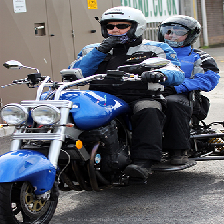

In [74]:
im

In [75]:
import pickle
filename_rfc_VGG = "/content/drive/My Drive/ML_Project/models/rfc_VGG"
rfc_VGG_model = pickle.load(open(filename_rfc_VGG,'rb'))

Helmet


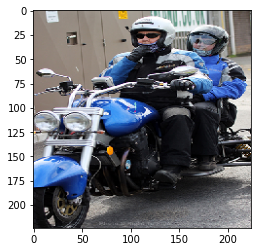

In [77]:
input_shape=(224,224,3)
vgg = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
for layer in vgg.layers:
    layer.trainable = False
img_array = img_to_array(im)
img_array = np.expand_dims(img_array, axis=0)
img_array = imagenet_utils.preprocess_input(img_array)
features = vgg.predict(img_array)
pred=rfc_VGG_model.predict(features.reshape(-1,7*7*512))
if pred[0] == 0:
  print('No Helmet')
else: print('Helmet')
plt.imshow(im)